In [4]:
%matplotlib inline
#调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，或者生成一个figure画布的时候,直接在python console里面生成图像

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
with tf.Graph().as_default() as g:
    #dataset API
    inp_out = tf.placeholder(shape=[None, 784],dtype=tf.float32) #输入层
    h = tf.keras.layers.Dense(32, activation=tf.nn.relu)(inp_out) #隐藏层 把784维降到32维
    out = tf.keras.layers.Dense(784, activation=tf.nn.sigmoid)(h) #输出层, 添加sigmod模型训练的更快（0,1）
    loss = tf.reduce_mean(tf.keras.losses.mean_squared_error(inp_out, out)) #所有样本的代价求平均
    # 保存模型
    # saver = tf.train.Saver()

0.23063843


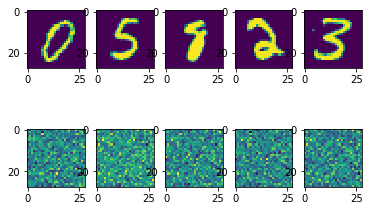

0.22959176


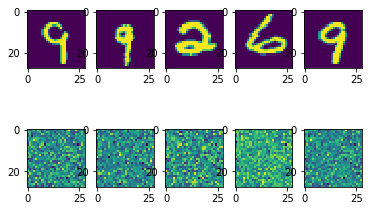

0.22679833


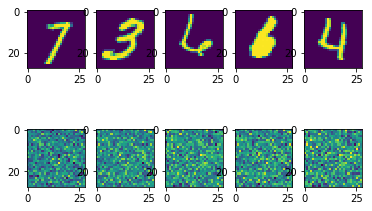

0.22651058


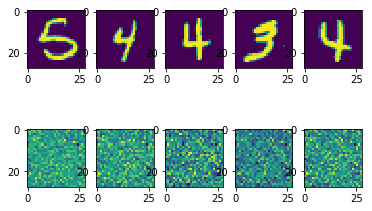

0.22515826


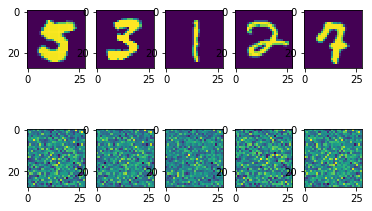

0.22198138


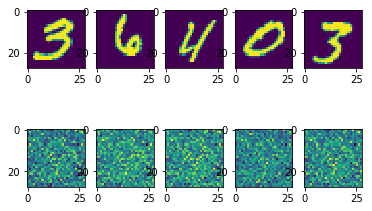

0.21628839


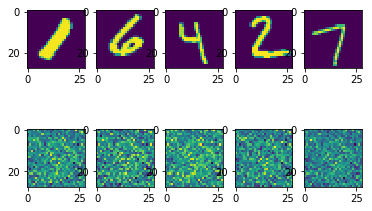

0.21320637


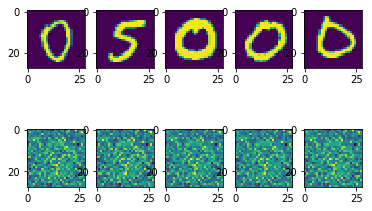

0.20778784


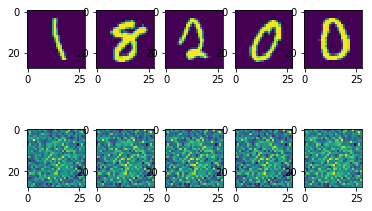

0.19879867


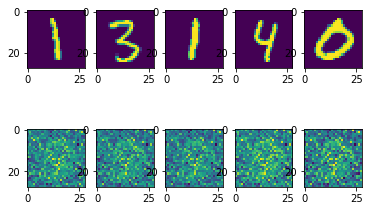

In [23]:
with tf.Session(graph=g) as sess:
    #声明梯度下降法的优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss) #代价最小化，运行train_op就更新参数一次
    sess.run(tf.global_variables_initializer())
    
    for i in range(5000):
        batch_img, _ = mnist.train.next_batch(32) #返回img和label，label没有使用，就用_
        res_loss, _ = sess.run([loss, train_op],feed_dict={inp_out: batch_img})
        
        if i % 500 == 0:
            print(res_loss)
            #可视化五张图片
            batch_img, _ = mnist.test.next_batch(5)
            res_out = sess.run(out, feed_dict={inp_out: batch_img})
            for j in range(10):
                plt.subplot(2,5,j+1) #定义画布，2行5列
                img = batch_img[j] if j < 5 else res_out[j-5]
                img = plt.imshow((img * 255).astype(np.uint8).reshape(28,28))
            plt.show()

In [ ]:
当自编码器容量太大是会发生什么，如何解决
隐藏层神经元太多，应减少神经元数量或加入正则惩罚

0.23168397


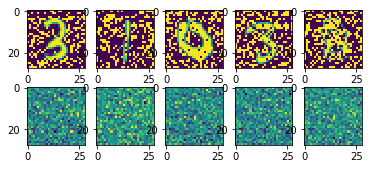

0.23149145


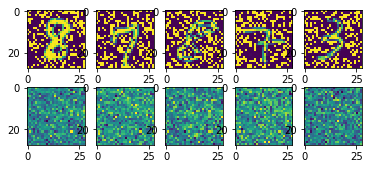

0.22824576


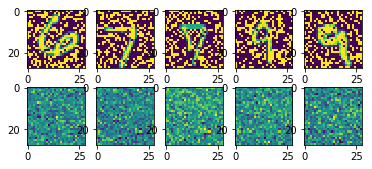

0.22965065


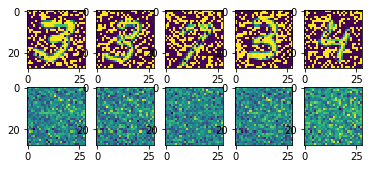

0.22603676


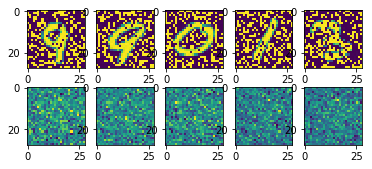

0.22599344


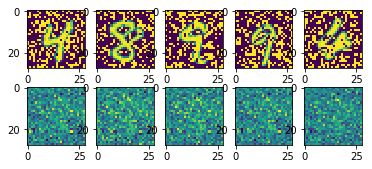

0.22015992


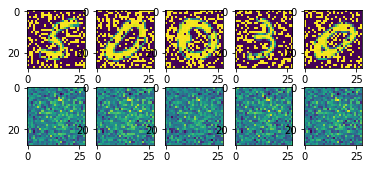

0.2154912


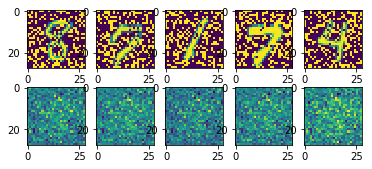

0.21688311


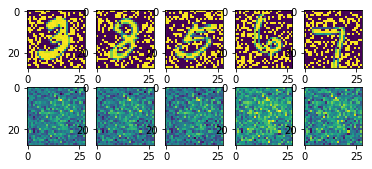

0.2060564


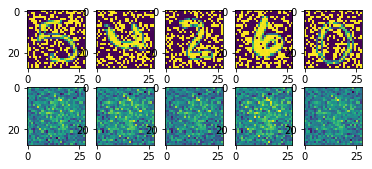